In [1]:
!pip install pingouin

     |████████████████████████████████| 183 kB 5.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 9.8 MB 22.9 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=67f43afc1a9ad0ef22e510993ef15022e2af34ca3ef1622528091a7eea3bcb9b
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=865ee69c4ef4c193b9e15473c8bbe3e5331939a9e72b102a1bf6b092deee2a28
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsm

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [5]:
echantillon = pd.read_csv('/content/drive/MyDrive/Projet7/data_mission4.csv')

In [6]:
echantillon.head()

,Unnamed: 0,country,income,gini,income_mean,classe_parent
0,0,ALB,728.89795,0.304624,2994.829902,1
1,1,ALB,728.89795,0.304624,2994.829902,1
2,2,ALB,728.89795,0.304624,2994.829902,1
3,3,ALB,728.89795,0.304624,2994.829902,1
4,4,ALB,728.89795,0.304624,2994.829902,1


In [7]:
echantillon = echantillon.rename(columns={"classe_parent":"quantile_parents"})

In [8]:
echantillon = echantillon[['country','quantile_parents','income','gini','income_mean']]

In [9]:
echantillon.head()

,country,quantile_parents,income,gini,income_mean
0,ALB,1,728.89795,0.304624,2994.829902
1,ALB,1,728.89795,0.304624,2994.829902
2,ALB,1,728.89795,0.304624,2994.829902
3,ALB,1,728.89795,0.304624,2994.829902
4,ALB,1,728.89795,0.304624,2994.829902


In [10]:
echantillon.tail()

,country,quantile_parents,income,gini,income_mean
5649995,ZAF,100,82408.55,0.669779,5617.90488
5649996,ZAF,100,82408.55,0.669779,5617.90488
5649997,ZAF,100,82408.55,0.669779,5617.90488
5649998,ZAF,100,82408.55,0.669779,5617.90488
5649999,ZAF,100,82408.55,0.669779,5617.90488


## Pour cette mission 4,
 nous chercherons à expliquer le revenu des individus en fonction de plusieurs variables explicatives : le pays de l'individu, l'indice de Gini de ce pays, la classe de revenus des parents, etc.
Appliquez une ANOVA sur vos données, en n’incluant comme variable explicative que le pays de l’individu. Analysez la performance du modèle.

ANOVA sert a expliquer une variable quantitative par 

une variable qualitative.


In [11]:
# on va faire dèja des graphique pour visualiser les choses on regade les pays que nous avons étudiés plus haut.
pays_etudie = ['ZAF','CHN','USA','PRT','FRA','SVN']

# varaible qualitative c'est le pays et variable quantitative c'est le pays

X = "country"
Y = "income"

sous_echantillon = echantillon[echantillon['country'].isin(pays_etudie)]


In [12]:
pays = sous_echantillon[X].unique()

In [13]:
groupes=[]
for p in pays:
  groupes.append(sous_echantillon[sous_echantillon[X]==p][Y])

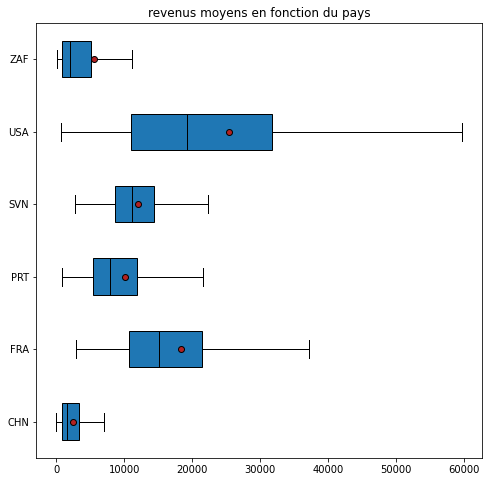

In [14]:
# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
fig = plt.figure(figsize = (8,8))    
plt.boxplot(groupes, labels=pays, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('revenus moyens en fonction du pays')
plt.show()
fig.savefig('revenus moyens en fonction du pays.png')

*ANOVA *

On teste hypothèse nulle HO : Les pays n'influent pas sur le revenus des individus : c'est à dire qu'il n'y a pas de de variation de la moyenne dans les groupes (pays)
Hypothèse H1 : Au moins un groupe(pays) est différents des autres

In [15]:
#on recupère un tableau moins grand pour l'anova sinon fait planter
df_anova = pd.read_csv('/content/drive/MyDrive/Projet7/df_anova.csv')

In [16]:
#on lance l'ANOVA 
#importation de ols ordinary last square 
#formule est un string où on met la variable    à expliquée et la variable explicative
#pbl n'arrive âs à utiliser le nouvel echantillon fait planter 
anova_country = smf.ols('income ~ country', data=df_anova).fit()

In [17]:
print(anova_country.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     98.03
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:15:58   Log-Likelihood:            -1.1556e+05
No. Observations:               11300   AIC:                         2.313e+05
Df Residuals:                   11187   BIC:                         2.322e+05
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2994.8299    671.704      4.

On regarde la F statistic c'est le test de Fisher ici il est à 0 donc c'est inférieur à 5% on rejète donc H0 qui est que le paramètre alpha (qui represente le pays est pareil partout ) Le pays a bien un effet sur le revenus , comme nous avions l'intuition en regardant le graphique plus haut

In [18]:
# on regarde le tableau de l'analyse de la variance 
sm.stats.anova_lm(anova_country, typ=2)

,sum_sq,df,F,PR(>F)
country,4.953839e+11,112.0,98.031906,0.0
Residual,5.047427e+11,11187.0,NaN,NaN


Analyser la performance du modèle

Pour valider la performance du modèle on doit analyser les résidus et on verifie les conditions suivantes:
homocédasticité : la variance des erreur est la meme
la normalité des residus
les observations doivent être indépendantes
la variable expliquée doit être continue

Approche visuelle

on regarde la normalité des résidus avec une approche visuelle l'approche visuelle est recommandé pour un grand echantillon
On peut utiliser un diagramme Quantile Quantile ou diagramme Q-Q ou Q-Q plot est un outil graphique permettant d'évaluer la pertinence de l'ajustement d'une distribution donnée à un modèle théorique.
Le terme de quantile-quantile provient du fait que l'on compare la position de certains quantiles dans la population observée avec leur position dans la population théorique.

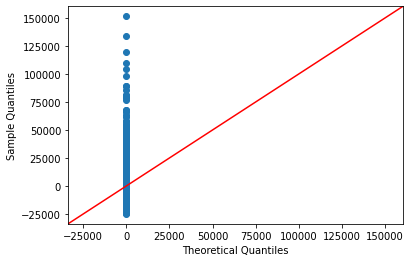

In [19]:
import scipy.stats as stats
# on récupère les résidus 
res = anova_country.resid
fig = sm.qqplot(res, line = '45')
plt.show()
fig.savefig('residus Anova.png')

In [20]:
#test de shapiro 
#on ne prend que 5000 car la pvalue n'est pas significative au dessus de 5000
table_shapiro = stats.shapiro(res.sample(5000))
table_shapiro

ShapiroResult(statistic=0.5425626039505005, pvalue=0.0)

In [21]:
#pip install pingouin

In [22]:
#on va. tester l'homogénéité de la variance , on utilise le test de levene car distribution non normale
#HO les variances sont égales 
import numpy as np
import pingouin as pg
test_levene = pg.homoscedasticity(df_anova, dv='income', group='country', method='levene', alpha=0.05)

In [23]:
test_levene

,W,pval,equal_var
levene,25.033017,0.0,False


La p value est à 0 donc on rejette H0 , l'hypothèse d'homocédasticité n'est pas vérifiée.
Le test de Kruskal-Wallis est un test robuste non paramétrique. Pas besoin de conditions préalables pour l'appliquer. Il permet de savoir, pour une variable pour laquelle on dispose de plusieurs catégories, si au moins une catégorie diffère. Comme il s'applique à la médiane, il peut passer en force même si les valeurs ne se répartissent pas selon la loi normale.

In [24]:
# on peut utiliser le test de Kruskal-Wallis
test_kruskal = pg.kruskal(df_anova, dv='income', between='country')


In [25]:
test_kruskal

,Source,ddof1,H,p-unc
Kruskal,country,112,8356.298462,0.0


Regressions

Pour chacune des régressions suivantes, on testera 2 versions : l'une en exprimant le revenu moyen du pays et les revenus (parents & enfants) en logarithme (ln), l'autre en les laissant tels quels. On choisira la version la plus performante.
Appliquez une régression linéaire sur vos données, en n’incluant comme variables explicatives uniquement le revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu. Quel est le pourcentage de variance expliquée par votre modèle ?
On prepare les données pour la regression

In [26]:
echantillon.head()

,country,quantile_parents,income,gini,income_mean
0,ALB,1,728.89795,0.304624,2994.829902
1,ALB,1,728.89795,0.304624,2994.829902
2,ALB,1,728.89795,0.304624,2994.829902
3,ALB,1,728.89795,0.304624,2994.829902
4,ALB,1,728.89795,0.304624,2994.829902


In [27]:
echantillon.tail()

,country,quantile_parents,income,gini,income_mean
5649995,ZAF,100,82408.55,0.669779,5617.90488
5649996,ZAF,100,82408.55,0.669779,5617.90488
5649997,ZAF,100,82408.55,0.669779,5617.90488
5649998,ZAF,100,82408.55,0.669779,5617.90488
5649999,ZAF,100,82408.55,0.669779,5617.90488


In [28]:
# VARIABLES en logarithme 
echantillon['ln_income']=  np.log(echantillon['income'])
echantillon['ln_income_mean'] = np.log(echantillon['income_mean'])

In [29]:
echantillon.head()

,country,quantile_parents,income,gini,income_mean,ln_income,ln_income_mean
0,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643
1,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643
2,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643
3,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643
4,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643


In [30]:
# regression lineaire 
reg_loga = smf.ols(formula='ln_income ~ ln_income_mean + gini', data=echantillon).fit()
print(reg_loga.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                 7.524e+06
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:16:07   Log-Likelihood:            -6.1815e+06
No. Observations:             5650000   AIC:                         1.236e+07
Df Residuals:                 5649997   BIC:                         1.236e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4646      0.003    160.

regarder interpretation tableau) R carré est à 0.661 plus le R carré s'approche de 1 et mieux le modèle est expliqué. La P value est inferieure à 5% pour les deux variables donc on peut dire que ces variables sont significatives Le coefficient de income_mean est positif donc plus le revenu moyen du pays est grand plus le revenu de l'individu est grand
le coefficient du coeff de gini est négatif, plus le coeff de gini des grand (donc plus il y a d'inégalite dans le pays) et plus le revenu sera petit.


<Figure size 360x360 with 0 Axes>

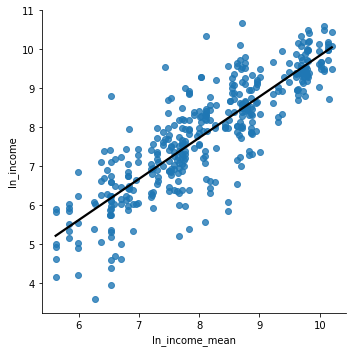

In [31]:
#on peut regarder la droite de regression
sample_echantillon_reg = echantillon.sample(400)
fig = plt.figure(figsize = (5,5))
ax = sns.lmplot(x='ln_income_mean', y='ln_income', data=sample_echantillon_reg, ci=None, line_kws={'color':'black'})
ax.set(xlabel='ln_income_mean', ylabel='ln_income')
plt.show()
fig.savefig('Droite Regression ln_income_mean et ln_income.png')

<Figure size 360x360 with 0 Axes>

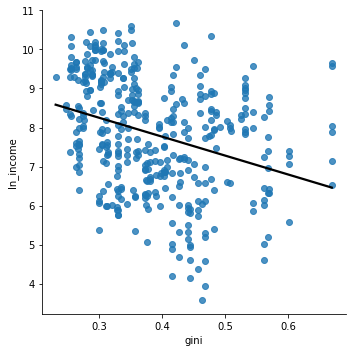

In [32]:
fig = plt.figure(figsize = (5,5))
ax = sns.lmplot(x='gini', y='ln_income', data=sample_echantillon_reg, ci=None, line_kws={'color':'black'})
ax.set(xlabel='gini', ylabel='ln_income')
plt.show()
fig.savefig('Droite Regression gini et ln_income.png')

In [33]:
#matrice de correlation
correlation_matrix = echantillon[['ln_income_mean','gini']].corr()


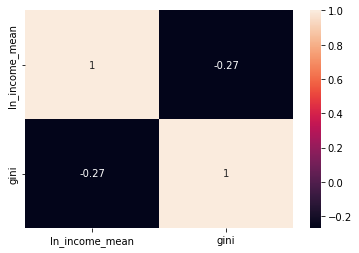

In [34]:
sns.heatmap(correlation_matrix, annot=True)

# test de normalité des résidus 

In [35]:
# on peut faire le test de shapiro wilk 
from scipy.stats import t, shapiro

In [36]:
#on ne prend que 5000 valeurs car la pvalue n'est pas significative au dessus de 5000
shapiro(reg_loga.resid.sample(5000))

ShapiroResult(statistic=0.9819257259368896, pvalue=8.929361133077251e-25)

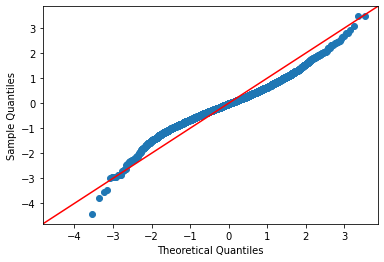

In [37]:
#qq plot
fig_res = sm.qqplot(reg_loga.resid.sample(5000), line = '45')
plt.show()
fig_res.savefig('residus test shapiro.png')

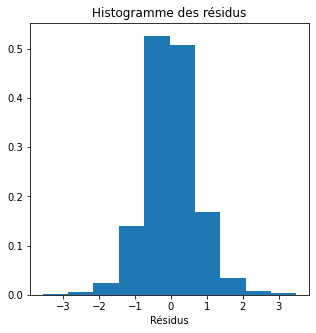

In [38]:
fig = plt.figure(figsize= (5,5))
plt.hist(reg_loga.resid.sample(5000), density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()
fig.savefig('Histogramme des résidus shapiro.png')

Ici, l'hypothèse de normalité est remise en cause (p-value < 0.05). Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes, même si le résidu n'est pas considéré comme étant gaussien.

## REGRESSIONS LINEAIRES variables  sans le logarithme

In [39]:
# regression lineaire 
reg_non_loga = smf.ols(formula='income ~ income_mean + gini', data=echantillon).fit()
print(reg_non_loga.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 2.773e+06
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:16:21   Log-Likelihood:            -5.7779e+07
No. Observations:             5650000   AIC:                         1.156e+08
Df Residuals:                 5649997   BIC:                         1.156e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.385e-11     14.213    6.6e-12      

Le R-squared est plus faible. En effet l'echelle des valeurs du revenu et du revenu moyen a beaucoup plus de poids que l'indice de gini. La p value de l'indice de gini est superieure à 0.05 donc il n'est plus significatif.
On a un problème de colinarité entre les variables (le programme envoi un warning)

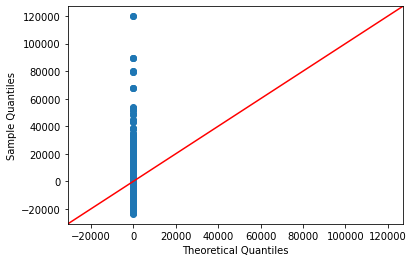

In [40]:
# test des residus
#qq plot
fig_res_non_log = sm.qqplot(reg_non_loga.resid.sample(5000), line = '45')
plt.show()
fig_res_non_log.savefig('qq plot residus regression non logarithme.png')

Nous allons mener des analyses sur les valeurs atypiques et/ou influentes en travaillant sur un dataframe appelé  analyses.

**POINTS ATYPIQUES**

Nous allons ici réaliser les tests à un niveau  𝛼=5
α
=
5
 % :

Récupérons $n$, le nombre d'individus de l'échantillon, et $p$, le nombre de variables.

In [41]:
alpha = .05
n = len(echantillon)
p = 3

In [42]:
#Création d'un dataframe spécifique à l'analyse des modèles
analyse = echantillon.copy()
analyse.head()

,country,quantile_parents,income,gini,income_mean,ln_income,ln_income_mean
0,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643
1,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643
2,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643
3,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643
4,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643


Analyse des leviers avec seuil :

Le seuil des leviers est de 
 
2
∗
p/n
.
On identifie les observations qui peuvent fausser les regressions

In [43]:
#Intégration de deux variables spécifiques à chacun des modèles
analyse['levier_modeleloga'] = reg_loga.get_influence().hat_matrix_diag
analyse['levier_modelenonloga'] = reg_non_loga.get_influence().hat_matrix_diag

In [44]:
analyse.head()

,country,quantile_parents,income,gini,income_mean,ln_income,ln_income_mean,levier_modeleloga,levier_modelenonloga
0,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643,3.206308e-07,4.199699e-07
1,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643,3.206308e-07,4.199699e-07
2,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643,3.206308e-07,4.199699e-07
3,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643,3.206308e-07,4.199699e-07
4,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643,3.206308e-07,4.199699e-07


In [45]:
#Simplification du dataframe pour une visualisation et interprétation plus rapide
analyse_levier = analyse.groupby('country')[['country', 'levier_modeleloga', 'levier_modelenonloga']].mean().reset_index()
analyse_levier.head()

,country,levier_modeleloga,levier_modelenonloga
0,ALB,3.206308e-07,4.199699e-07
1,ARG,3.761873e-07,2.946857e-07
2,ARM,6.551930e-07,7.374536e-07
3,AUT,6.355951e-07,6.927698e-07
4,AZE,3.253577e-07,4.170974e-07


In [46]:
analyse_levier.tail()

,country,levier_modeleloga,levier_modelenonloga
108,USA,9.457327e-07,2.238685e-06
109,VEN,2.425420e-07,2.499135e-07
110,VNM,2.915041e-07,2.817339e-07
111,YEM,3.790040e-07,3.018029e-07
112,ZAF,2.334513e-06,2.241022e-06


In [47]:
seuil_levier = 2*p/n

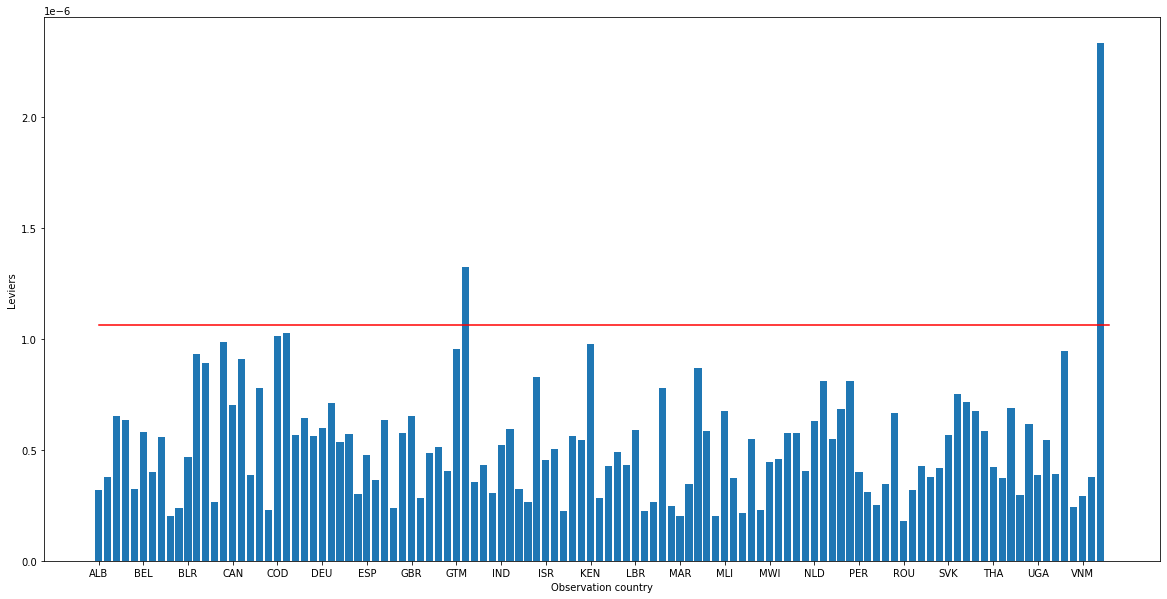

In [48]:
#modèle logarithme
plt.figure(figsize=(20,10))
plt.bar(analyse_levier['country'], analyse_levier['levier_modeleloga'])
plt.xticks(np.arange(0, 115, step=5))
plt.xlabel('Observation country')
plt.ylabel('Leviers')
plt.plot([0, 113], [seuil_levier, seuil_levier], color='r')
plt.savefig('analyselevier_modeleloga.png')
plt.show()

Pour sélectionner les points pour lesquels le levier est supérieur au seuil, on exécute la ligne suivante :

In [49]:
analyse_levier.loc[analyse_levier['levier_modeleloga'] > seuil_levier, :]

,country,levier_modeleloga,levier_modelenonloga
41,HND,0.000001,0.000001
112,ZAF,0.000002,0.000002


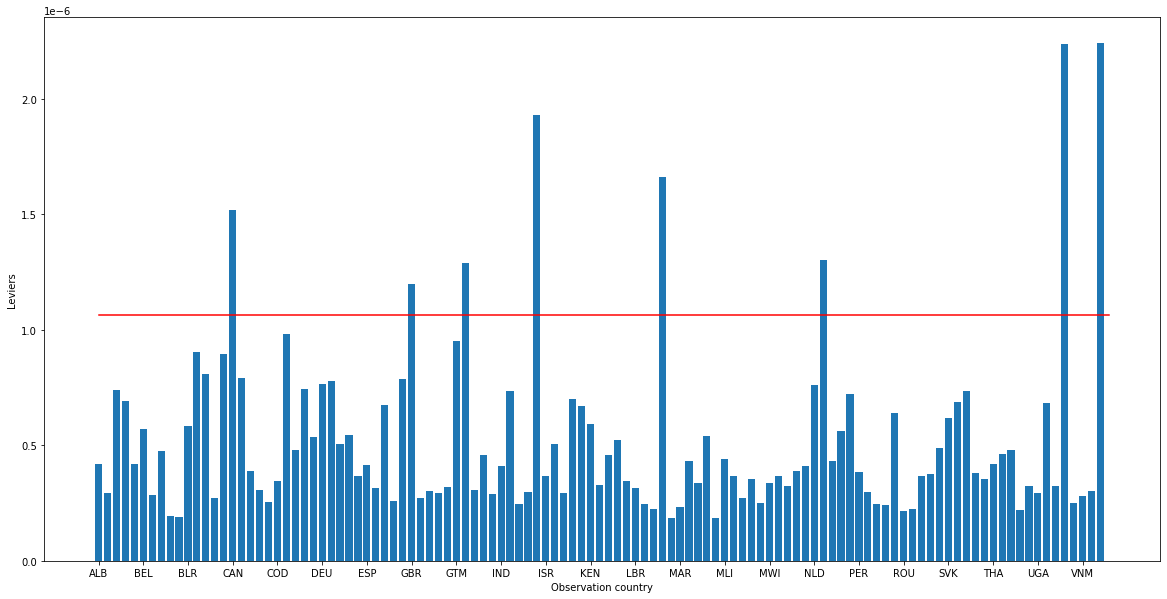

In [50]:
#modèle non loga
plt.figure(figsize=(20,10))
plt.bar(analyse_levier['country'], analyse_levier['levier_modelenonloga'])
plt.xticks(np.arange(0, 115, step=5))
plt.xlabel('Observation country')
plt.ylabel('Leviers')
plt.plot([0, 113], [seuil_levier, seuil_levier], color='r')
plt.savefig('analyselevier_modelenonloga.png')
plt.show()

In [51]:
analyse_levier.loc[analyse_levier['levier_modelenonloga'] > seuil_levier, :]

,country,levier_modeleloga,levier_modelenonloga
15,CAN,7.009219e-07,0.000002
35,GBR,6.517148e-07,0.000001
41,HND,1.325634e-06,0.000001
49,ISL,8.275095e-07,0.000002
63,LUX,7.772744e-07,0.000002
81,NOR,8.090581e-07,0.000001
108,USA,9.457327e-07,0.000002
112,ZAF,2.334513e-06,0.000002


In [52]:
#en %
print("Modèle nonloga: " + str(round(len(analyse_levier[analyse_levier['levier_modelenonloga'] 
                    > seuil_levier])/len(analyse_levier['levier_modelenonloga'])*100, 2)) + '%')
print("Modèle loga: " + str(round(len(analyse_levier[analyse_levier['levier_modeleloga'] 
                    > seuil_levier])/len(analyse_levier['levier_modelenonloga'])*100, 2)) + '%')

Modèle nonloga: 7.08%
Modèle loga: 1.77%


Le modèle non loga a plus de valeurs atypiques que le modèle loga

Pour la variable à expliquée on regarde les residus studentisés

## Calculez les résidus studentisés

Si l'on souhaite maintenant calculer les résidus studentisés, nous écrivons ceci, sachant que le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté :

In [53]:
#Intégration de deux nouvelles variables propres à chaque modèle
analyse['rstudent_modelenonloga'] = reg_non_loga.get_influence().resid_studentized_internal
analyse['rstudent_modeleloga'] = reg_loga.get_influence().resid_studentized_internal

seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

In [54]:
analyse.head()

,country,quantile_parents,income,gini,income_mean,ln_income,ln_income_mean,levier_modeleloga,levier_modelenonloga,rstudent_modelenonloga,rstudent_modeleloga
0,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643,3.206308e-07,4.199699e-07,-0.33904,-1.755904
1,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643,3.206308e-07,4.199699e-07,-0.33904,-1.755904
2,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643,3.206308e-07,4.199699e-07,-0.33904,-1.755904
3,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643,3.206308e-07,4.199699e-07,-0.33904,-1.755904
4,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643,3.206308e-07,4.199699e-07,-0.33904,-1.755904


In [55]:

residus_modelenonloga=analyse.loc[analyse['rstudent_modelenonloga'] > seuil_rstudent, :]

In [56]:
print(residus_modelenonloga.shape)

(148000, 11)


In [57]:
residus_modelenonloga.head()

,country,quantile_parents,income,gini,income_mean,ln_income,ln_income_mean,levier_modeleloga,levier_modelenonloga,rstudent_modelenonloga,rstudent_modeleloga
49500,ALB,22,17754.324,0.304624,2994.829902,9.784384,8.004643,3.206308e-07,4.199699e-07,2.208389,2.662539
49501,ALB,27,17754.324,0.304624,2994.829902,9.784384,8.004643,3.206308e-07,4.199699e-07,2.208389,2.662539
49502,ALB,34,17754.324,0.304624,2994.829902,9.784384,8.004643,3.206308e-07,4.199699e-07,2.208389,2.662539
49503,ALB,39,17754.324,0.304624,2994.829902,9.784384,8.004643,3.206308e-07,4.199699e-07,2.208389,2.662539
49504,ALB,43,17754.324,0.304624,2994.829902,9.784384,8.004643,3.206308e-07,4.199699e-07,2.208389,2.662539


In [58]:
residus_modelenonloga = residus_modelenonloga.groupby('country').mean().reset_index()

In [59]:
residus_modelenonloga[['country','rstudent_modelenonloga']]

,country,rstudent_modelenonloga
0,ALB,2.208389
1,ARG,3.546055
2,AUT,3.701725
3,BEL,4.258405
4,BGR,2.766157
...,...,...
62,TUR,3.587336
63,URY,3.748833
64,USA,5.963662
65,VEN,3.245490


In [60]:
residus_modeleloga=analyse.loc[analyse['rstudent_modeleloga'] > seuil_rstudent, :]

In [61]:
residus_modeleloga.shape

(166000, 11)

In [62]:
residus_modeleloga = residus_modeleloga.groupby('country').mean().reset_index()

In [63]:
residus_modeleloga = residus_modeleloga[['country','rstudent_modeleloga']]

In [64]:
residus_modeleloga

,country,rstudent_modeleloga
0,ALB,2.662539
1,ARG,2.444811
2,ARM,2.023583
3,AUT,2.204359
4,AZE,2.467199
...,...,...
103,USA,2.509407
104,VEN,2.548009
105,VNM,2.622005
106,YEM,2.785721


Les residus studentisé qui depassent le seuil sont de 67 pour le modèle loga et 107 pour le modèle nonloga

## Colinéarité des variables

In [65]:
#modèle non logarithme
variables = reg_non_loga.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.1470133515079508, 1.1470133515091312]

In [66]:
#modèle logarithme
variables = reg_loga.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0772771218313182, 1.0772771218307668]

Ici, tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité

## classe parent : logarithme

In [67]:
echantillon.head()

,country,quantile_parents,income,gini,income_mean,ln_income,ln_income_mean
0,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643
1,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643
2,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643
3,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643
4,ALB,1,728.89795,0.304624,2994.829902,6.591534,8.004643


In [68]:
echantillon.tail()

,country,quantile_parents,income,gini,income_mean,ln_income,ln_income_mean
5649995,ZAF,100,82408.55,0.669779,5617.90488,11.319444,8.633714
5649996,ZAF,100,82408.55,0.669779,5617.90488,11.319444,8.633714
5649997,ZAF,100,82408.55,0.669779,5617.90488,11.319444,8.633714
5649998,ZAF,100,82408.55,0.669779,5617.90488,11.319444,8.633714
5649999,ZAF,100,82408.55,0.669779,5617.90488,11.319444,8.633714


In [69]:
# regression lineaire 
reg_loga_2 = smf.ols(formula='ln_income ~ ln_income_mean + gini + quantile_parents', data=echantillon).fit()
print(reg_loga_2.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                 6.654e+06
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:47:05   Log-Likelihood:            -5.5796e+06
No. Observations:             5650000   AIC:                         1.116e+07
Df Residuals:                 5649996   BIC:                         1.116e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0891      0.003  

La p value est significative pour le quantile parent !!! le modèle explique plus de variance

In [70]:
# regression lineaire 
reg_non_loga_2 = smf.ols(formula='income ~ income_mean + gini + quantile_parents', data=echantillon).fit()
print(reg_non_loga_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                 2.043e+06
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:47:13   Log-Likelihood:            -5.7635e+07
No. Observations:             5650000   AIC:                         1.153e+08
Df Residuals:                 5649996   BIC:                         1.153e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2602.4140     14.663  

P value significative pour ci parents donc ça explique une partie du modèle même sans le logarithme alors que gini non

Decomposition de la variance

SCT = SCE+ SCR

In [71]:
res_regr_log = sm.stats.anova_lm(reg_loga_2, typ=2)
res_regr_log 

,sum_sq,df,F,PR(>F)
ln_income_mean,6.712016e+06,1.0,1.590604e+07,0.0
gini,1.139280e+05,1.0,2.699849e+05,0.0
quantile_parents,5.661255e+05,1.0,1.341596e+06,0.0
Residual,2.384181e+06,5649996.0,NaN,NaN


In [76]:
6.712016e+06+1.139280e+05+5.661255e+05

7392069.5

In [74]:
# SCT
sct_reg_loga_2 = res_regr_log.values[:,0].sum()
sct_reg_loga_2

9776249.947308961

In [75]:
#SCE
regr_log_sce = res_regr_log.values[0,0]+res_regr_log.values[1,0]+res_regr_log.values[2,0]
regr_log_sce

7392069.364875533

In [77]:
#SCR
regr_log_scr = res_regr_log.values[3,0]
regr_log_scr

2384180.5824334295

In [79]:
#R2
regr_log_r2 = regr_log_sce/sct_reg_loga_2
regr_log_r2

0.7561252427788321

In [81]:
#variance expliquée par income 
6.712016e+06/sct_reg_loga_2


0.686563461058764

In [82]:
#Variance expliquée par l'indice de Gini
1.139280e+05	/sct_reg_loga_2 

0.011653548202433198

In [84]:
#Variance expliquée par la classe de revenu des parents
5.661255e+05	/sct_reg_loga_2

0.057908247339342356

In [85]:
#Variance expliquée par Les résidus
2.384181e+06/sct_reg_loga_2

0.24387479993351402